# Phase 1 Assignment

## Part 1 - Data Collection

In [1]:
import json
import sys
import time
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Function for returning census population data
def get_cPop(address):

    time.sleep(0.2)

    url = 'https://koordinates.com/services/query/v1/vector.json'

# Selecting the lng and lat from corresponding row in dataframe
    is_address = df['Address'] == address
    this_row = df[is_address]
    lng = this_row['Longitude']
    lat = this_row['Latitude']

    params = {
        'key' : 'b8e7dd0e1e2943be97dc6b8e1ede6264',
        'layer' : '104612',
        'x' : lng,
        'y' : lat
    }

    response = requests.get(url, params=params)

    if response.status_code != 200:
        return pd.Series({'2018_Census_Population' : response.status_code})

    cPop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']

    return pd.Series({'2018_Census_Population' : cPop})

In [ ]:
df = pd.read_csv('Dataset for Assignment.csv')

In [ ]:
sample = df.head(5)

In [ ]:
sample

In [ ]:
sample['2018_Census_Population'] = sample.apply(get_cPop)

In [ ]:
# After first testing on sample, I now do it for all the data
df['2018_Census_Population'] = df.Address.apply(get_cPop)

In [ ]:
# Writing to a new csv, now with the 2018 Census Population column
df.to_csv('Dataset v2.csv', index=False)

In [ ]:
df1 = pd.read_csv('Dataset v2.csv')

In [ ]:
df2 = pd.read_excel('otago730395.xlsx')

In [ ]:
# Merging the data
df3 = df1.merge(df2, left_on='SA1', right_on='SA12018_code')

In [ ]:
# Dropping unwanted columns, leaving only NZDep2018
df3 = df3.drop(['SA12018_code', 'NZDep2018_Score', 'URPopnSA1_2018', 'SA22018_code', 'SA22018_name'], axis = 1)

In [ ]:
# Writing to a new csv, now with both the 2018 Census Population column and Deprivation Index
df3.to_csv('Dataset v3.csv', index=False)

In [ ]:
df3

## Part 2 - Cleaning Data

In [51]:
house_prices = pd.read_csv('Dataset v3.csv')

In [ ]:
house_prices.head()

In [14]:
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,2018_Census_Population,NZDep2018
count,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,3.764313,2.067748,85.343511,1.388525e+06,-36.893906,174.799673,7.006328e+06,47.550573,28.900763,26.988550,24.128817,22.625954,29.398855,179.842557,5.068702
std,1.097355,0.976412,158.995565,1.184433e+06,0.130219,0.119510,2.588575e+03,24.707947,21.003745,17.941161,10.958008,10.216350,21.823974,71.059286,2.914420
min,1.000000,1.000000,4.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,32.000000,7.800000e+05,-36.950873,174.722226,7.004422e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,57.000000,1.080000e+06,-36.893409,174.798728,7.006334e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,82.000000,1.600000e+06,-36.856094,174.881058,7.008390e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.750000,8.000000
max,9.000000,7.000000,2224.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


In [17]:
# Exporting the describe() to use in my report
house_prices.describe().to_csv('house_prices_describe().csv')

In [ ]:
# 1051 rows, 17 columns
house_prices.shape

In [ ]:
# First checking the data types in the dataset
house_prices.dtypes

In [52]:
# Chaning 'Land area' from object to float
house_prices['Land area'] = house_prices['Land area'].str.extract('(\d+)').astype(float)

In [ ]:
# Checking for missing values, True means there is at least one missing value
house_prices.isnull().values.any()

In [ ]:
# Number of missing values in each column
# Only a total of 3 missing values
house_prices.isnull().sum()


In [12]:
# The 3 rows with initially missing values
# Rows 309, 311, 568
house_prices[house_prices.isnull().values.any(axis=1)]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,2018_Census_Population,NZDep2018


In [53]:
# As we know there are other houses recorded with Great Barrier Island as their suburb, this one instance of a missing suburb seems like it was just accidentally left out. So I will fill it in.
house_prices = house_prices.fillna({'Suburbs' : 'Great Barrier Island'})
house_prices.iloc[568]

Bedrooms                                                                  1
Bathrooms                                                                 1
Address                   14 Te Rangitawhiri Road Great Barrier Island, ...
Land area                                                              2141
CV                                                                   740000
Latitude                                                           -36.1973
Longitude                                                           175.417
SA1                                                                 7001131
0-19 years                                                               27
20-29 years                                                               6
30-39 years                                                               6
40-49 years                                                              18
50-59 years                                                              39
60+ years   

In [54]:
# With the remaining two missing values in number of bathrooms at rows 309 and 311, we cannot determine what the values are, so I have decided to drop these 2 rows from our dataset.
house_prices = house_prices.drop([309, 311], axis = 0)


In [55]:
# Confirming rows 309 and 311 have been dropped
house_prices.iloc[308:312]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,2018_Census_Population,NZDep2018
308,4,2.0,"87 Naylors Drive Mangere, Auckland",221.0,720000,-36.982632,174.796744,7008064,123,51,48,27,24,21,Mangere,300,9.0
310,4,2.0,"12 Hea Road Hobsonville, Auckland",191.0,530000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
312,2,1.0,"1/67 Buckland Road Mangere, Auckland",80.0,580000,-36.971814,174.832079,7008292,54,30,39,15,27,39,Mangere East,201,8.0
313,3,2.0,"89 Kauri Point Road Laingholm, Auckland",1528.0,770000,-36.977279,174.631677,7007165,27,3,18,30,15,12,Laingholm,108,2.0


In [56]:
# Next up, with regards to the 'Land area' column, I am worried that the granularity of the numbers in this column could have a negative impact on accuracy in a machine-learning model. So I am going to use the binning technique, by dividing each number in this column by 10, and rounding down to the nearest integer.
# This should reduce the granularity/number of unique values in this column by a little. This makes sense as a difference of 10 square metres in land area should not make a big difference in the CV of a house.
for index, row in house_prices.iterrows():
    house_prices.loc[index, 'Land area'] = math.floor(row['Land area'] / 10)
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,2018_Census_Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",71.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",56.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",62.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",6.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",60.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


#### Now to attempt to remove outliers in my dataset. To identify potential outliers, I primarily looked at house_prices.describe() as above, and also at the histograms which are shown in part 3 further below.

In [57]:
# There seems to be an outlier in the max number of bedrooms (17).
# Locating the row number: 611
house_prices[house_prices['Bedrooms'] == 17]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,2018_Census_Population,NZDep2018
611,17,8.0,"Sandringham Auckland City 1025 Sandringham, ...",159.0,760000,-36.883613,174.738889,7004981,21,21,18,21,9,12,Sandringham,111,6.0


In [58]:
# Dropping row 611
house_prices = house_prices.drop(611, axis = 0)

In [59]:
# Now when we describe(), the max for bedrooms is now 9.
house_prices.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,2018_Census_Population,NZDep2018
count,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,3.764313,2.067748,85.343511,1.388525e+06,-36.893906,174.799673,7.006328e+06,47.550573,28.900763,26.988550,24.128817,22.625954,29.398855,179.842557,5.068702
std,1.097355,0.976412,158.995565,1.184433e+06,0.130219,0.119510,2.588575e+03,24.707947,21.003745,17.941161,10.958008,10.216350,21.823974,71.059286,2.914420
min,1.000000,1.000000,4.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,32.000000,7.800000e+05,-36.950873,174.722226,7.004422e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,57.000000,1.080000e+06,-36.893409,174.798728,7.006334e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,82.000000,1.600000e+06,-36.856094,174.881058,7.008390e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.750000,8.000000
max,9.000000,7.000000,2224.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


#### Now my dataset is now for the most part "cleaned" and ready for a machine learning model.

In [60]:
# Saving my "cleaned" dataset.
house_prices.to_csv('Dataset v4.csv', index=False)

## Part 3 - Data Analysis

In [61]:
house_prices = pd.read_csv('Dataset v4.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B69F9DD08>,
      dtype=object)

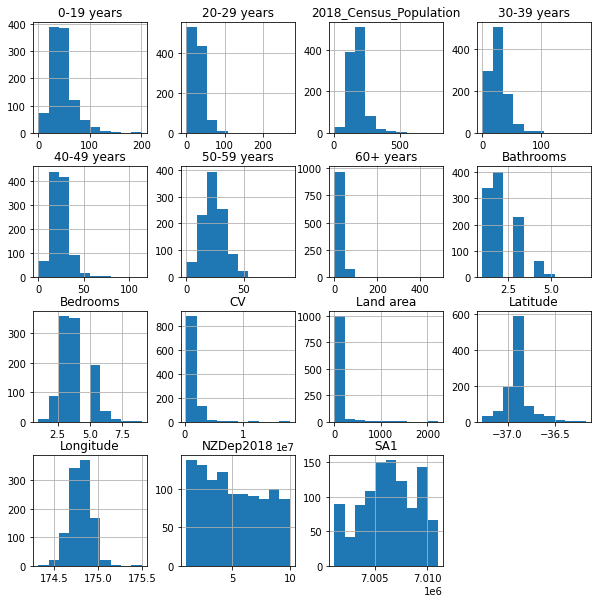

In [62]:
house_prices.hist(figsize = (10, 10))

#### Initially we can see there seem to be slightly more relatively cheaper houses than more expensive ones.
#### We also see that there are more houses in lower deprivation index zones than in higher deprivation index zones.

In [ ]:
sns.pairplot(house_prices, size = 2.0)

#### Pairplots, very helpful for visualising the dataset.

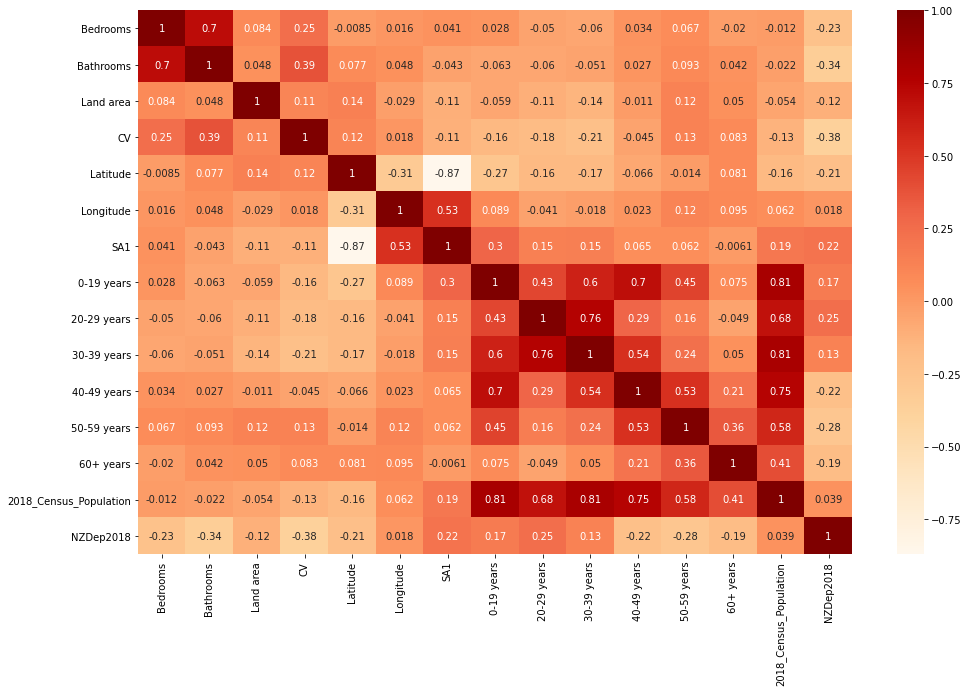

In [13]:
ax, fig = plt.subplots(figsize = (16, 10))
correlation_matrix = house_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

#### Now seeing the colour map of the correlation coefficients, this makes the data much easier to understand.
#### There is a slight positive correlation between Capital Value (CV) and the number of bathrooms in the house (c = 0.39), as well as between CV and number of bedrooms (c = 0.25).
#### The age of the people living in the house have almost a very small negative correlation to the CV of the house from ages 0-49, and have a very small positive correlation to the CV of the house from ages 50+. However, small correlation coefficients should be expected in this case as typically the age of the occupants do not have a large effect on house pricing.
#### Land area has a weak positive correlation to the CV of the house (c = 0.11).

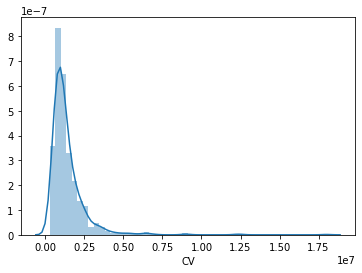

In [64]:
sns.distplot(house_prices['CV'])

#### Plotting the CV, it seems to be very slightly skewed to the left. There seems to be slightly more relatively cheaper houses than more expensive ones.

## Part 4 - Machine Learning Model Building

In [2]:
house_prices = pd.read_csv('Dataset v4.csv')

#### I will be trying to predict the CV of a house, considering the following variables:
#### 'Bedrooms', 'Bathrooms', 'Land area', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 2018_Census_Population', 'NZDep2018'.

In [3]:
# Therefore, I will be dropping the CV column and the other unneeded columns for my final dataset that I will be using in the machine learning model.

x = house_prices.drop(['Address', 'CV', 'Latitude', 'Longitude', 'SA1', 'Suburbs'], axis = 1)

In [4]:
y = house_prices['CV']

In [5]:
# So, 20% of my dataset will be used to train my model, 80% will be used to test my model.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 999)

In [6]:
# I will be using the random forest classifier model
model = LinearRegression()

In [7]:
model.fit(train_x, train_y)

LinearRegression()

In [8]:
# Predicting on the "test" dataset
predicted = model.predict(test_x)

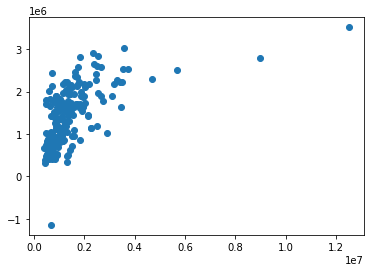

In [9]:
plt.scatter(test_y, predicted)

In [10]:
# R^2 value (coefficient of determination)
model.score(test_x, test_y)

0.34273499686793674